In [1]:
import data_loader as dl

# Указание пути к CSV-файлу
file_path = '/Users/lubovsoldatenko/DataspellProjects/datascience/HW4/data/Traffic.csv'

# Загрузка данных
loader = dl.LoadData()
df = loader.load_csv(file_path)

Файл /Users/lubovsoldatenko/DataspellProjects/datascience/HW4/data/Traffic.csv успешно загружен.


In [2]:
# Просмотр данных
df.head(5)

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal


Тк в столбцах Date и Day of the week значения постоянные, эти столбцы можно удалить

In [3]:
from HW4.data_analyzer import MissingValuesHandler

# Создаем объект обработчика
handler = MissingValuesHandler(df)

# Удаляем столбцы
df = handler.remove_columns(['Date', 'Day of the week'])
print("\nDataFrame после удаления столбцов")
print(df)



DataFrame после удаления столбцов
             Time  CarCount  BikeCount  BusCount  TruckCount  Total  \
0     12:00:00 AM        31          0         4           4     39   
1     12:15:00 AM        49          0         3           3     55   
2     12:30:00 AM        46          0         3           6     55   
3     12:45:00 AM        51          0         2           5     58   
4      1:00:00 AM        57          6        15          16     94   
...           ...       ...        ...       ...         ...    ...   
2971  10:45:00 PM        16          3         1          36     56   
2972  11:00:00 PM        11          0         1          30     42   
2973  11:15:00 PM        15          4         1          25     45   
2974  11:30:00 PM        16          5         0          27     48   
2975  11:45:00 PM        14          3         1          15     33   

     Traffic Situation  
0                  low  
1                  low  
2                  low  
3           

In [4]:
# Информация о данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               2976 non-null   object
 1   CarCount           2976 non-null   int64 
 2   BikeCount          2976 non-null   int64 
 3   BusCount           2976 non-null   int64 
 4   TruckCount         2976 non-null   int64 
 5   Total              2976 non-null   int64 
 6   Traffic Situation  2976 non-null   object
dtypes: int64(5), object(2)
memory usage: 162.9+ KB


In [5]:
# Базовая статистика
df.describe()

,CarCount,BikeCount,BusCount,TruckCount,Total
count,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000
mean,68.696573,14.917339,15.279570,15.324933,114.218414
std,45.850693,12.847518,14.341986,10.603833,60.190627
min,6.000000,0.000000,0.000000,0.000000,21.000000
25%,19.000000,5.000000,1.000000,6.000000,55.000000
50%,64.000000,12.000000,12.000000,14.000000,109.000000
75%,107.000000,22.000000,25.000000,23.000000,164.000000
max,180.000000,70.000000,50.000000,40.000000,279.000000


In [6]:
# Количество значений в датасете
len(df)

2976

In [7]:
# Подсчет пропущенных значений
handler.count_missing_values()

Time                 0
CarCount             0
BikeCount            0
BusCount             0
TruckCount           0
Total                0
Traffic Situation    0
dtype: int64

In [8]:
# Отчет о пропущенных данных
handler.missing_values_report()


 Отчет о пропущенных значениях:
                   Missing Values  Missing Percentage
Time                            0                 0.0
CarCount                        0                 0.0
BikeCount                       0                 0.0
BusCount                        0                 0.0
TruckCount                      0                 0.0
Total                           0                 0.0
Traffic Situation               0                 0.0


Датасет полный, без пропусков

Визуализация

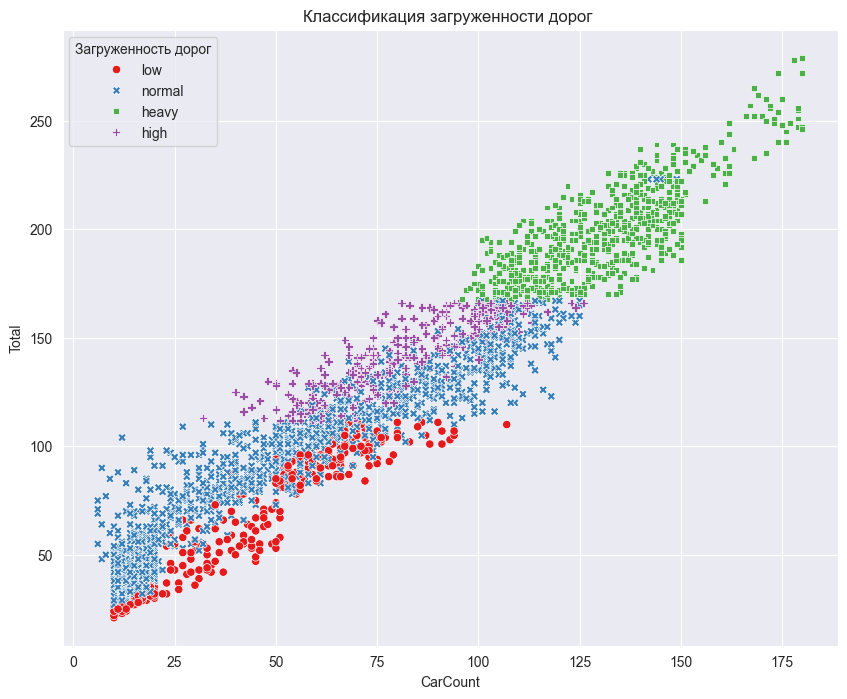

In [9]:
#Визуализация для проверки распределения классов
import seaborn as sns
import matplotlib.pyplot as plt

# Предположим, что у нас есть два числовых признака и колонка 'Traffic Situation' с 4 категориями
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='CarCount', y='Total', hue='Traffic Situation', style='Traffic Situation', palette='Set1')
plt.title("Классификация загруженности дорог ")
plt.xlabel("CarCount")
plt.ylabel("Total")
plt.legend(title="Загруженность дорог")
plt.show()


In [10]:
# Проверка, количесва данных в каждом классе, чтобы понять, насколько сбалансирован датасет
df['Traffic Situation'].value_counts()

Traffic Situation
normal    1669
heavy      682
high       321
low        304
Name: count, dtype: int64

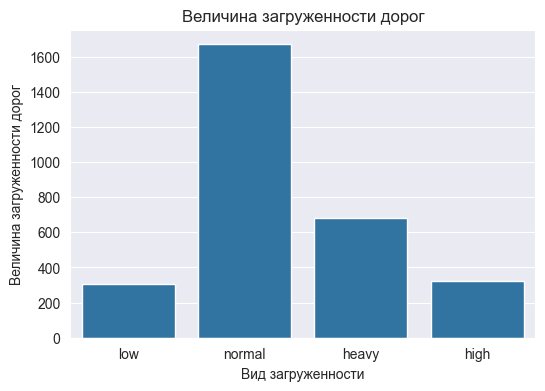

In [11]:
# Величина загруженности дорог
plt.figure(figsize=(6, 4))
sns.countplot(x='Traffic Situation', data=df)
plt.title('Величина загруженности дорог')
plt.xlabel('Вид загруженности')
plt.ylabel('Величина загруженности дорог')
plt.show()

In [12]:
# Кодирование категориальных признаков
df['Time'] = df['Time'].astype('category').cat.codes
df['Traffic Situation'] = df['Traffic Situation'].astype('category').cat.codes

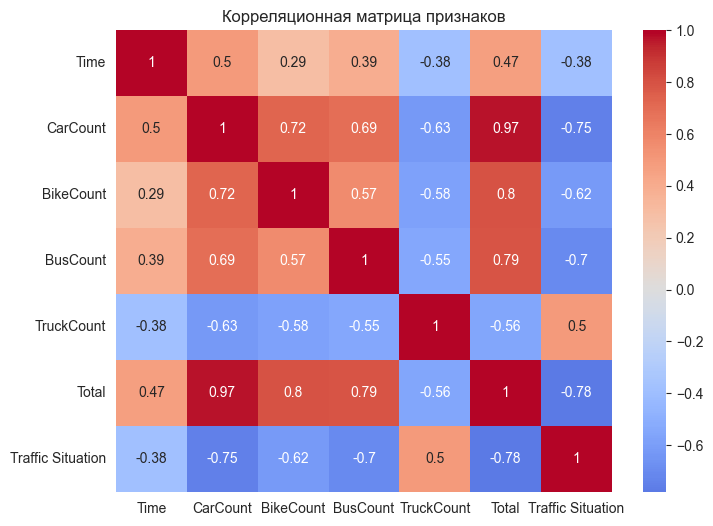

In [13]:
# Матрица корреляций
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Корреляционная матрица признаков')
plt.show()

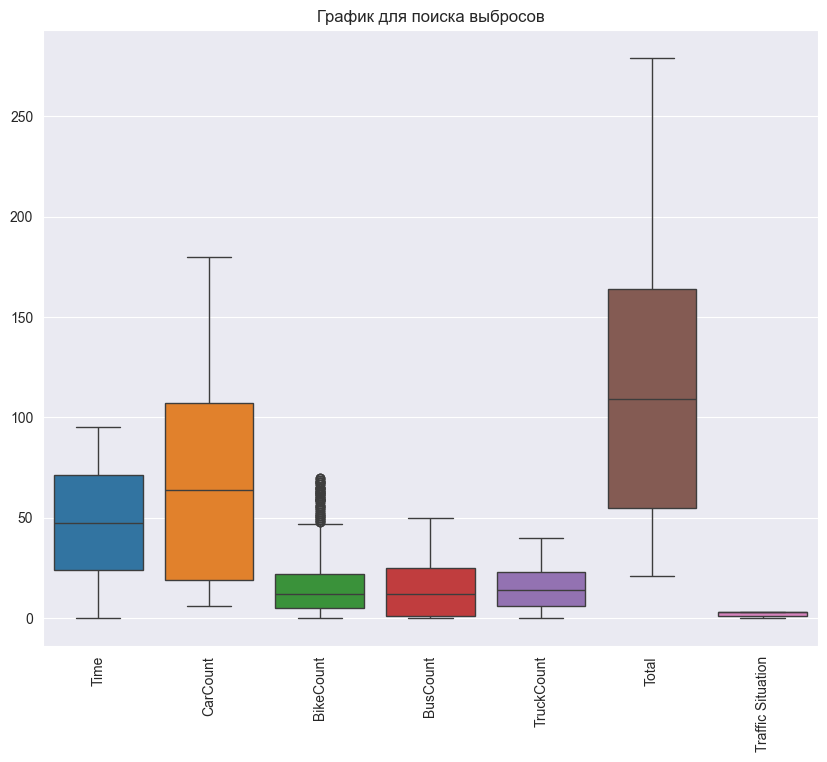

In [14]:
# Ящик с усами
plt.figure(figsize=(10, 8))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title('График для поиска выбросов')
plt.show()

Из визуализации видно, что в датасете присутствуют выбросы

In [15]:
# Поиск выбросов для параметра BikeCount
Q1 = df['BikeCount'].quantile(0.25)
Q3 = df['BikeCount'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['BikeCount'] < lower_bound) | (df['BikeCount'] > upper_bound)]
print(f'Найдено {len(outliers)} выбросов')

Найдено 77 выбросов


Преобразование признаков


Тк в датасете присутствуют выбросы, для масштабирования можно использовать RobustScaler (устойчив к выбросам)

In [16]:
from sklearn.preprocessing import RobustScaler
import pandas as pd

# Применяем RobustScaler
scaler = RobustScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

print("До масштабирования:\n", df)
print("\nПосле RobustScaler:\n", df_scaled)

До масштабирования:
       Time  CarCount  BikeCount  BusCount  TruckCount  Total  \
0       16        31          0         4           4     39   
1       18        49          0         3           3     55   
2       20        46          0         3           6     55   
3       22        51          0         2           5     58   
4       24        57          6        15          16     94   
...    ...       ...        ...       ...         ...    ...   
2971     7        16          3         1          36     56   
2972     9        11          0         1          30     42   
2973    11        15          4         1          25     45   
2974    13        16          5         0          27     48   
2975    15        14          3         1          15     33   

      Traffic Situation  
0                     2  
1                     2  
2                     2  
3                     2  
4                     3  
...                 ...  
2971                  3  
29

Выбор признаков


In [17]:
from sklearn.model_selection import train_test_split

# Разделяем на признаки (X) и целевую переменную (y)
X = df.drop(columns=["Traffic Situation"])
y = df["Traffic Situation"]

# Разделяем на обучающую (80%) и тестовую (20%) выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [18]:
from sklearn.feature_selection import SelectKBest, f_classif

In [19]:
# ANOVA F-тест
k = 3  # Количество признаков для отбора
selector = SelectKBest(score_func=f_classif, k=k)
X_train_best = selector.fit_transform(X_train, y_train)
X_test_best = selector.transform(X_test)

# Получение имен выбранных признаков
selected_features = selector.get_support(indices=True)
selected_feature_names = X.columns[selected_features]
print(f"\nОтобранные признаки с помощью SelectKBest (k={k}):")
print(selected_feature_names.tolist())


Отобранные признаки с помощью SelectKBest (k=3):
['CarCount', 'BusCount', 'Total']


Классификатор градиентного бустинга (Gradient Boosting Classifier)

In [28]:
# Импортируем необходимые библиотеки
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.model_selection import train_test_split

import pandas as pd

# Разделяем на признаки (X) и целевую переменную (y)
X = df.drop(columns=["Traffic Situation"])
y = df["Traffic Situation"]

# Создание новых признаков
# Статистические признаки (среднее, медиана, стандартное отклонение)
X["mean"] = X.mean(axis=1)
X["std"] = X.std(axis=1)
X["median"] = X.median(axis=1)

# Объединяем новые признаки
X_new = np.hstack(X[["mean", "std", "median"]].values)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Нормализация данных
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Создание модели Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(n_estimators=200, max_depth=3, learning_rate=0.01,
                                           subsample=0.8, max_features="sqrt", random_state=42)

# Обучение модели на обучающем наборе данных
gb_classifier.fit(X_train, y_train)

# Предсказание классов на тестовом наборе данных
y_pred = gb_classifier.predict(X_test)

# Оценка производительности модели
accuracy_gb = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_gb}")

# Вывод полного отчета
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9916107382550335
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       137
           1       1.00      0.94      0.97        64
           2       1.00      1.00      1.00        61
           3       0.99      1.00      0.99       334

    accuracy                           0.99       596
   macro avg       1.00      0.98      0.99       596
weighted avg       0.99      0.99      0.99       596

Confusion Matrix:
[[137   0   0   0]
 [  0  60   0   4]
 [  0   0  61   0]
 [  1   0   0 333]]


Изначально показатели в отчете были почти все = 1.00, соответственно модель переобучилась. Чтобы исправить эту ситуацию, я добавила генерацию признаков и немного изменила параметры в самом классификаторе Градиентного бустинга, а именно снилиза количество деревьев, уменьшила их глубину и скорость обучения. Показатели в отчете стали лучше (возможно я перестаралась, еще пробовала воспользоваться регуляризацией, но она почему-то не сильно улучшила показатели и все еще были единицы).

Для интереса я подобрала лучшие параметры, с ними у модели нет переобучнеия, но все-таки единицы присутствуют

In [21]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
}

grid_search = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Лучшие параметры:", grid_search.best_params_)
best_model = grid_search.best_estimator_

Лучшие параметры: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}


Классификатор Extra Trees (Extremely Randomized Trees)

In [22]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Нормализация данных
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Создание и обучение классификатора Extra Trees
clf = ExtraTreesClassifier(n_estimators=100, max_features='sqrt', random_state=42)
clf.fit(X_train, y_train)

# Прогнозирование и оценка точности
y_pred = clf.predict(X_test)

# Оценка производительности модели
accuracy_extra_trees = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_extra_trees}")

# Вывод полного отчета
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9798657718120806
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       127
           1       0.97      0.95      0.96        63
           2       1.00      0.98      0.99        66
           3       0.99      0.98      0.98       340

    accuracy                           0.98       596
   macro avg       0.98      0.98      0.98       596
weighted avg       0.98      0.98      0.98       596

Confusion Matrix:
[[127   0   0   0]
 [  0  60   0   3]
 [  0   0  65   1]
 [  6   2   0 332]]


Квадратичный дискриминантный анализ (Quadratic Discriminant Analysis, QDA)

In [23]:
# QDA
# Импортируем необходимые библиотеки
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report

# Нормализация данных
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Разделяем на признаки (X) и целевую переменную (y)
X = df.drop(columns=["Traffic Situation"])
y = df["Traffic Situation"]

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание модели QDA
qda_classifier = QuadraticDiscriminantAnalysis()

# Обучение модели на обучающем наборе данных
qda_classifier.fit(X_train, y_train)

# Предсказание классов на тестовом наборе данных
y_pred = qda_classifier.predict(X_test)

# Оценка производительности модели
accuracy_qda = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_qda}")

# Вывод полного отчета
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8473154362416108
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.94      0.87       127
           1       0.64      0.79      0.71        63
           2       0.69      0.89      0.78        66
           3       0.97      0.81      0.88       340

    accuracy                           0.85       596
   macro avg       0.78      0.86      0.81       596
weighted avg       0.87      0.85      0.85       596

Confusion Matrix:
[[119   8   0   0]
 [ 10  50   0   3]
 [  0   0  59   7]
 [ 17  20  26 277]]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 2 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The cova

K Nearest Neighbors (K-ближайших соседей)

In [24]:
# KNeighborsClassifier
# Импортируем необходимые библиотеки
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

# Разделяем на признаки (X) и целевую переменную (y)
X = df.drop(columns=["Traffic Situation"])
y = df["Traffic Situation"]

# Нормализация данных
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Настройка гиперпараметра k с использованием GridSearchCV
param_grid = {'n_neighbors': np.arange(1, 50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X_train, y_train)

# Вывод лучшего значения k
print("Лучшее значение k:", knn_cv.best_params_['n_neighbors'])

# Обучение модели с лучшим значением k
knn_best = KNeighborsClassifier(n_neighbors=knn_cv.best_params_['n_neighbors'])
knn_best.fit(X_train, y_train)

# Предсказание на тестовом наборе
y_pred = knn_best.predict(X_test)

# Оценка производительности модели
accuracy_knn_best = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_knn_best}")

# Вывод полного отчета
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Лучшее значение k: 12
Accuracy: 0.9328859060402684
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       127
           1       0.88      0.83      0.85        63
           2       0.89      0.94      0.91        66
           3       0.97      0.94      0.96       340

    accuracy                           0.93       596
   macro avg       0.91      0.92      0.91       596
weighted avg       0.93      0.93      0.93       596

Confusion Matrix:
[[122   4   0   1]
 [  7  52   0   4]
 [  0   0  62   4]
 [  9   3   8 320]]


Dummy Classifier

In [25]:
# Dummy Classifier с параметром most_frequent
# Импорт библиотек
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Разделяем на признаки (X) и целевую переменную (y)
X = df.drop(columns=["Traffic Situation"])
y = df["Traffic Situation"]

# Нормализация данных
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Создание и обучение модели Decision Tree Classifier

# Создание и обучение Dummy Classifier
dummy_clf = DummyClassifier(strategy="stratified") # stratified
dummy_clf.fit(X_train, y_train)

# Оценка модели
y_pred = dummy_clf.predict(X_test)

# Оценка производительности модели
accuracy_dummy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_dummy}")

# Вывод полного отчета
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.3624161073825503
Classification Report:
              precision    recall  f1-score   support

           0       0.19      0.21      0.20       137
           1       0.07      0.06      0.07        64
           2       0.10      0.10      0.10        61
           3       0.54      0.53      0.54       334

    accuracy                           0.36       596
   macro avg       0.23      0.23      0.23       596
weighted avg       0.37      0.36      0.36       596

Confusion Matrix:
[[ 29  11  15  82]
 [ 19   4   7  34]
 [ 16   6   6  33]
 [ 87  38  32 177]]


Сравнение классификаторов

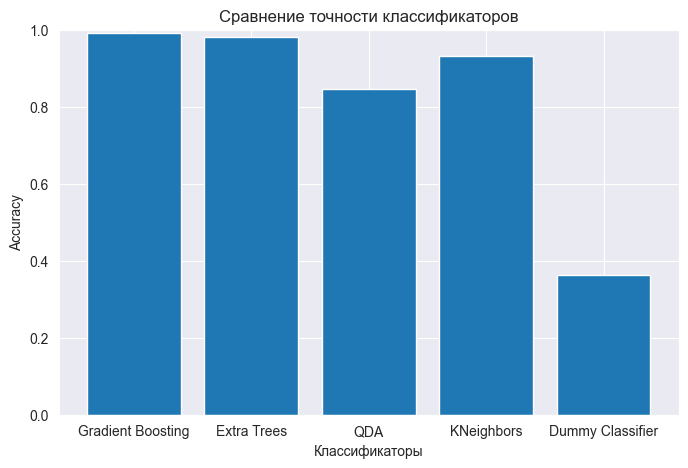

In [29]:
import matplotlib.pyplot as plt

# Создаем список классификаторов
classifiers_names = ["Gradient Boosting", "Extra Trees", "QDA", "KNeighbors", "Dummy Classifier"]
accuracies = [accuracy_gb, accuracy_extra_trees, accuracy_qda, accuracy_knn_best, accuracy_dummy]

# Визуализация результатов
plt.figure(figsize=(8, 5))
plt.bar(classifiers_names, accuracies)
plt.xlabel("Классификаторы")
plt.ylabel("Accuracy")
plt.ylim(0, 1)  # Ограничиваем диапазон
plt.title("Сравнение точности классификаторов")
plt.show()


Из графика можно сделать вывод, что лучше справился классификатор Gradient Boosting, однако, там есть риск переобучения и более подходящим кажется Extra Trees.